In [178]:
import numpy as np
import matplotlib.pyplot as plt
from shone.opacity import Opacity
from shone.chemistry.fastchem import FastchemWrapper

In [298]:
wavelength = np.linspace(0.81, 1.64, 200)  # [µm]
pressure = np.geomspace(1e-7, 100, 500)
temperature = 600 * (pressure / 0.1) ** 0.08
# species_table = chem.get_species()
species = ['H2O', 'CH4', 'CO2', 'CO',
               'NH3']
binned_opacities = []
for spec in species:
    op = Opacity.load_species_from_name(spec)
    binned_opacities.append(
        # op.get_binned_interpolator(wavelength, np.array([500, 800]), np.array([0.001, 0.01, 0.1, 1.0]))
        op.get_binned_interpolator(wavelength, temperature, pressure)
    )
mmw_neptune = 10  # [AMU]

/Users/wiwa8630/shone/shone/chemistry/fastchem.py:47: UserWarning: It appears that you're using a Mac with one of Apple's ARM-based processors. Some results from FastChem may be inaccurate on this processor, especially at lower temperatures and pressures. For more details, see: https://github.com/NewStrangeWorlds/FastChem/issues/9
  warnings.warn(msg, UserWarning)


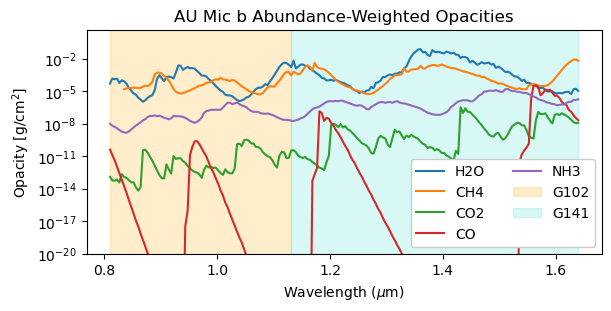

In [299]:
_P = 0.01
_T = 600
FastchemWrapper(np.array([_T]), np.array([_P]))
vmr = chem.vmr()
weights = chem.get_weights()

plt.figure(figsize=(6,3))
for i, spec in enumerate(species):
    op = binned_opacities[i](_T, _P)[0]  # cm2 / g
    col_idx = chem.get_column_index(species_name=spec)[0]
    species_weight = weights[col_idx] / mmw_neptune

    abund_weighted_opacity = op * species_weight * vmr[:, col_idx]
    plt.semilogy(wavelength, abund_weighted_opacity, label=spec)

plt.axvspan(0.81,1.13,label='G102',alpha=0.2,color='orange')
plt.axvspan(1.13,1.64,label='G141',alpha=0.2,color='turquoise')
plt.ylim(1e-20,None)
plt.ylabel(r'Opacity [g/cm$^2$]')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.legend(framealpha=1,ncol=2,loc='lower right')
plt.title('AU Mic b Abundance-Weighted Opacities')
plt.savefig('../figs/AUMicb_abund_weighted_opacities_speciesused.png')